In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [3]:
seq = np.array([i for i in range(1,101)])
ws = 3
x= []
y= []
for i in range(len(seq)-ws):
  x.append(seq[i:i+ws])
  y.append(seq[i+ws])

In [4]:
x = np.array(x)
y = np.array(y)

In [5]:
x = x.reshape((x.shape[0],x.shape[1],1))

In [8]:
model =  Sequential()
model.add(SimpleRNN(50,activation='relu',input_shape=(ws,1)))
model.add(Dense(1))

model.compile(optimizer = 'adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(x,y,epochs = 1000,verbose = 0)
print("Training complete")

Training complete


In [12]:
test_ip = np.array([9,10,11])
test_ip = test_ip.reshape((1,ws,1))
y_pred = model.predict(test_ip,verbose = 0)
print(f"Predicted number : {y_pred[0][0]:.2f}")

Predicted number : 11.97


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


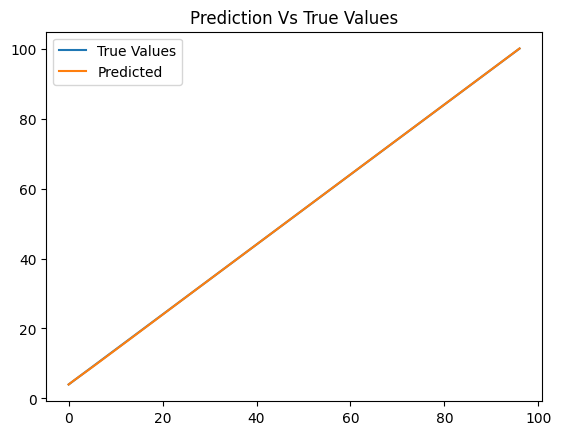

In [21]:
y_pred = model.predict(x)
plt.plot(y,label='True Values')
plt.plot(y_pred,label = 'Predicted')
plt.legend()
plt.title("Prediction Vs True Values")
plt.show()